In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np
import math

In [2]:
# Insurance dataset
insurance_dataset = [[22,1,0], [25,0,0],[47,1,1],[52,0,0],[46,1,1],[56,1,1],
                     [55,0,0],[60,0,1],[62,1,1],[61,1,1],[18,1,0],[28,1,0],
                     [27,0,0],[29,0,0],[49,1,1],[55,1,1],[25,0,1],[58,1,1],
                     [19,0,0],[18,1,0],[21,1,0],[26,0,0],[40,1,1],[45,1,1],
                     [50,1,1],[54,1,1],[23,1,0],[46,1,0]]
insurance_df = pd.DataFrame(insurance_dataset, columns=['age', 'affordibility', 'bought_insurance'])
  
insurance_df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [3]:
insurance_df_scaled = insurance_df.copy()
insurance_df_scaled['age_scaled'] = insurance_df['age']/100
insurance_df_scaled.head()

,age,affordibility,bought_insurance,age_scaled
0,22,1,0,0.22
1,25,0,0,0.25
2,47,1,1,0.47
3,52,0,0,0.52
4,46,1,1,0.46


In [4]:
insurance_df_scaled.shape

(28, 4)

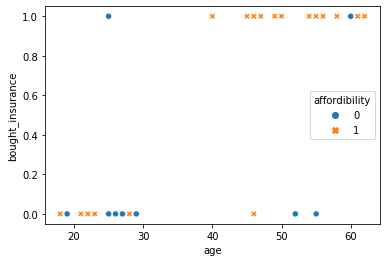

In [5]:
sns.scatterplot(data=insurance_df_scaled, x="age", y="bought_insurance", hue="affordibility", style="affordibility")

In [6]:
x_train, x_test, y_train, y_test = train_test_split(insurance_df_scaled[['age_scaled', 'affordibility']], insurance_df_scaled['bought_insurance'], test_size=0.2, random_state=42)

In [7]:
x_train.head()

,age_scaled,affordibility
17,0.58,1
22,0.40,1
11,0.28,1
13,0.29,0
15,0.55,1


In [8]:
# Load Tf model
# Setting all initial weights to 1
# Setting initial bias to 0
tf_model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])
tf_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [9]:
tf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
tf_model.fit(x=x_train, y=y_train, epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 639ms/step - loss: 0.7428 - accuracy: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 10ms/step - loss: 0.7424 - accuracy: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 7ms/step - loss: 0.7420 - accuracy: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 7ms/step - loss: 0.7416 - accuracy: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 0.7411 - accuracy: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 7ms/step - loss: 0.7407 - accuracy: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 7ms/step - loss: 0.7403 - accuracy: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 0.7399 - accuracy: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 7ms/step - loss: 0.7395 - accuracy: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 7ms/step - loss: 0.7390 - accuracy: 0.5000
Epoch 11/500
1/1 [========

In [11]:
tf_model.evaluate(x=x_train, y=y_train)

1/1 [==============================] - 0s 466ms/step - loss: 0.6431 - accuracy: 0.5909


[0.6430774927139282, 0.5909090638160706]

In [83]:
# Creating own neural network using python
class nn_python:
  def __init__(self):
    self.w1 = 1
    self.w2 = 1
    self.b = 0

  def fit(self, x, y, epochs):
    x_list = x.to_numpy()

    for i in range(epochs):
      predicted_probabilities_list = []

      for each_x in x_list:
        # predicted_probability = sigmod((x1*w1 + x2*w2) + b)
        predicted_probability =  self.sigmoid(sum(each_x*[self.w1,self.w2])+self.b)

        predicted_probabilities_list.append(predicted_probability)

      cost = self.binary_cross_entropy(y.values.tolist(), predicted_probabilities_list)
      print("epoch ", i + 1, "Cost ", cost)
      self.w1, self.w2, self.b = self.gradient_descent(x['age_scaled'],x['affordibility'],predicted_probabilities_list,y)

  # Activation Function Sigmoid
  def sigmoid(self, value):
    value_sigmoid = 1/(1+math.exp(-value))
    return value_sigmoid

  # Cost function binary cross entropy
  # https://www.analyticsvidhya.com/blog/2021/03/binary-cross-entropy-log-loss-for-binary-classification/
  def binary_cross_entropy(self, actual_y, predicted_probabilities):

    corrected_probability_logs = []

    # Calculating Corrected Probabilities Log
    for (i,j) in zip(actual_y, predicted_probabilities):
      if i == 0:
        corrected_probability_logs.append(math.log(1-j, 10))
      elif i == 1:
        corrected_probability_logs.append(math.log(j, 10))

    total_cost = -(sum(corrected_probability_logs)/len(predicted_probabilities))

    return total_cost

  def gradient_descent(self, age, affordability, y_predicted, y_true):
    rate = 0.5
    n = len(age)

    
    # dot product of age and loss = (x1*loss1) + (x2*loss2)
    w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
    w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 

    bias_d = np.mean(y_predicted-y_true)

    w1 = self.w1 - rate * w1d
    w2 = self.w2 - rate * w2d
    bias = self.b - rate * bias_d

    return (w1, w2, bias)

In [84]:
neural_networt = nn_python()
neural_networt.fit(x=x_train, y=y_train, epochs=500)

epoch  1 Cost  0.32260647399065623
epoch  2 Cost  0.30713941784242993
epoch  3 Cost  0.2959665610414179
epoch  4 Cost  0.28808612132759603
epoch  5 Cost  0.2826140292011357
epoch  6 Cost  0.27883912342426787
epoch  7 Cost  0.2762267939145237
epoch  8 Cost  0.27439441316492746
epoch  9 Cost  0.27307761673976083
epoch  10 Cost  0.27209827982057483
epoch  11 Cost  0.2713385012727105
epoch  12 Cost  0.2707212165183591
epoch  13 Cost  0.27019649585717737
epoch  14 Cost  0.2697321873515665
epoch  15 Cost  0.2693076714438302
epoch  16 Cost  0.26890975725482014
epoch  17 Cost  0.26853001533501625
epoch  18 Cost  0.2681630573169518
epoch  19 Cost  0.2678054323707856
epoch  20 Cost  0.26745492210165733
epoch  21 Cost  0.26711009130904734
epoch  22 Cost  0.26677000234939063
epoch  23 Cost  0.2664340337861558
epoch  24 Cost  0.26610176536702185
epoch  25 Cost  0.265772905115818
epoch  26 Cost  0.2654472431335719
epoch  27 Cost  0.2651246223240124
epoch  28 Cost  0.26480491983711674
epoch  29 Cost 

In [75]:
age = [[10,15]]
ypy = [[0.5], [0.6]]

np.dot(age, ypy) # (10*0.5) + (15*0.6)

array([[14.]])

9.0